Problem Description
Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

Dataset Description
A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 52310 customers and the test dataset consists of 22421 customers. Following are the features of the dataset

1. Target: Claim Status (Claim)
2. Name of agency (Agency) - Categorical
3. Type of travel insurance agencies (Agency.Type) - Categorical
4. Distribution channel of travel insurance agencies  - Categorical
5. Name of the travel insurance products (Product.Name) - Categorical
6. Duration of travel (Duration)
7. Destination of travel (Destination)
8. Amount of sales of travel insurance policies (Net_Sales)
9. The commission received for travel insurance agency (Comission)
10. Age of insured (Age)
11. The identification record of every observation (ID)





In [1]:
#importing basic useful libraries to load and visualise dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [3]:
df_train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [4]:
df_test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


First, lets rename a few columns for ease

In [5]:
df_train = df_train.rename({'Commision (in value)' : 'Comission'}, axis = 'columns')
df_test = df_test.rename({'Commision (in value)' : 'Comission'}, axis = 'columns')
df_train = df_train.rename({'Net Sales' : 'Net_Sales'}, axis = 'columns')
df_test = df_test.rename({'Net Sales' : 'Net_Sales'}, axis = 'columns')
df_train = df_train.rename({'Product Name' : 'Product'}, axis = 'columns')
df_test = df_test.rename({'Product Name' : 'Product'}, axis = 'columns')
df_train = df_train.rename({'Distribution Channel' : 'Channel'}, axis = 'columns')
df_test = df_test.rename({'Distribution Channel' : 'Channel'}, axis = 'columns')

First, lets check all the categorical features and understand how many categories we have

In [6]:
df_train['Agency'].value_counts()

EPX    26218
C2B    10615
CWT     6813
JZI     4619
LWC      806
SSI      780
JWT      550
RAB      527
TST      394
KML      313
ART      223
CCR      156
TTW      104
CBH       76
CSR       60
ADM       56
Name: Agency, dtype: int64

We have 16 agencies, distributed among Travel Agency and Airlines types an functioning among online and offline channels. Lets check the distribution of agencies among agency types and distribution channels

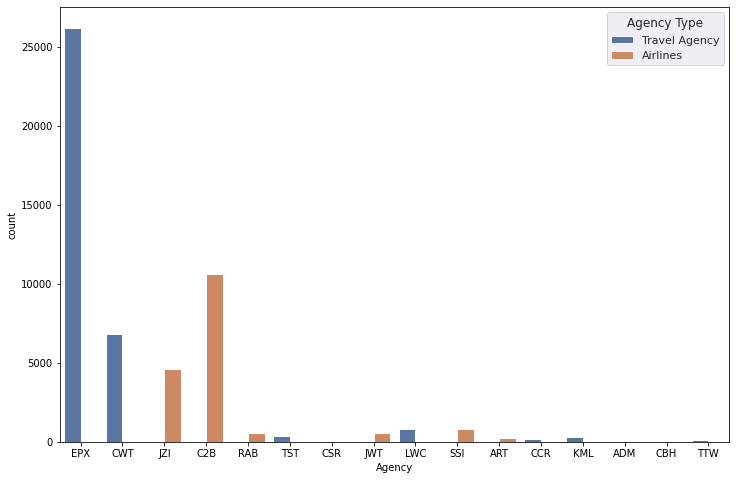

In [7]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Agency', hue = 'Agency Type', data = df_train, ax = ax)

As seen in the above plot, we have 6 airlines and 10 travel agencies we are dealing with. EXP and CWT amounts to highest numbers among agencies and JZIO and C2B among Airlines. 

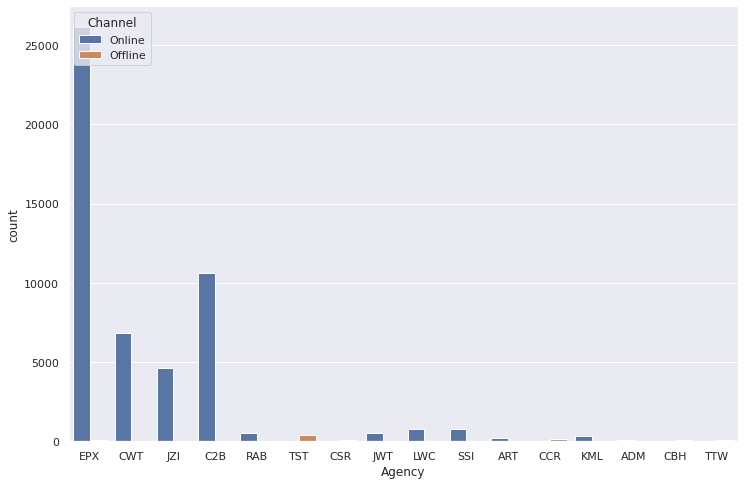

In [8]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Agency', hue = 'Channel', data = df_train, ax = ax)

The above graph shows how both agencies and airlines are conducting online distribution over offline. Similarly if we check the df_test datast, we will find similar pattern. We can see from the above graphs that the claim ratio is mainly dominated by online distribution and among agencies. Airlines have lower contributions compared to agencies. To confirm this, we will plot the net sales across agency types

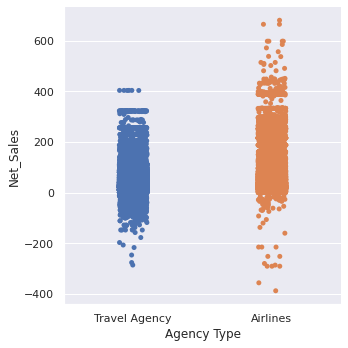

In [9]:
sns.catplot(x="Agency Type", y="Net_Sales", data=df_train)

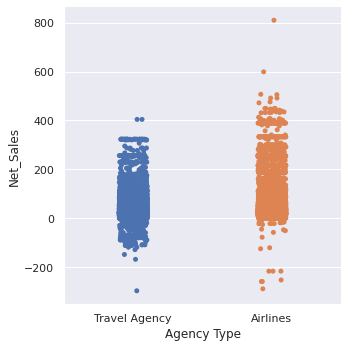

In [10]:
sns.catplot(x="Agency Type", y="Net_Sales", data=df_test)

As seen in both the charts above, Airlines have higher number of sales compared to agencies. Airlines also tend to make high value sales 

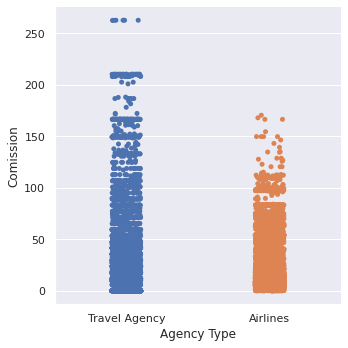

In [11]:
sns.catplot(x="Agency Type", y="Comission", data=df_train)

In [12]:
df_train.columns

Index(['ID', 'Agency', 'Agency Type', 'Channel', 'Product', 'Duration',
       'Destination', 'Net_Sales', 'Comission', 'Age', 'Claim'],
      dtype='object')

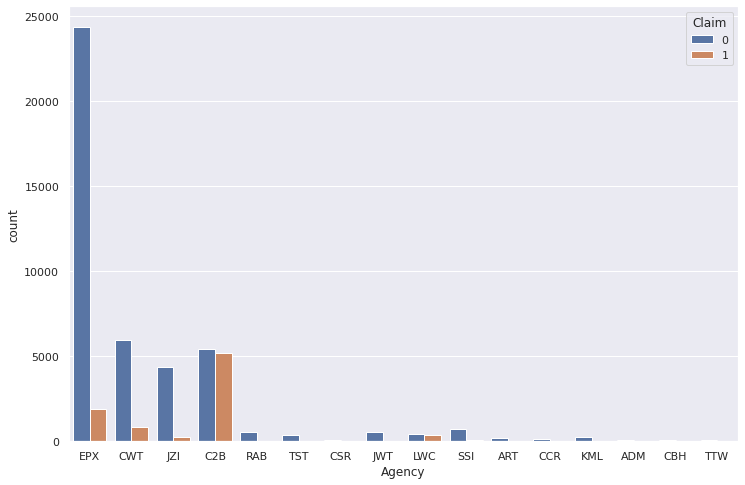

In [13]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Agency', hue = 'Claim', data = df_train, ax = ax)

However, if we look at comissions, agengies tend to make a lot more than the airlines. Lets check the cliam ratio acorss features

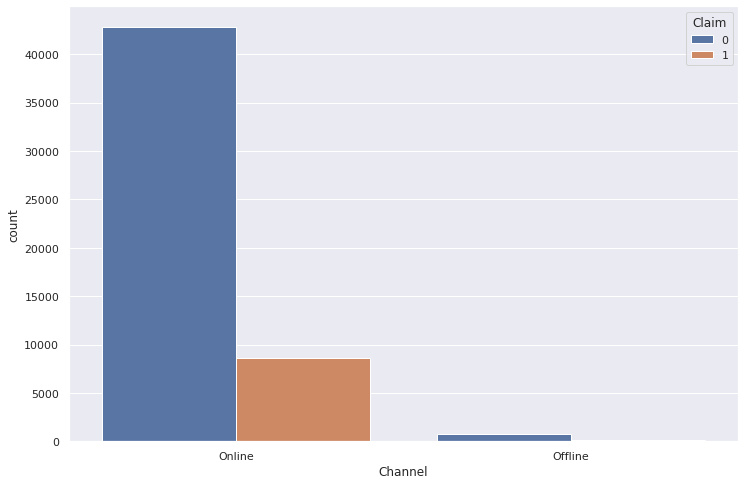

In [14]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Channel', hue = 'Claim', data = df_train, ax = ax)

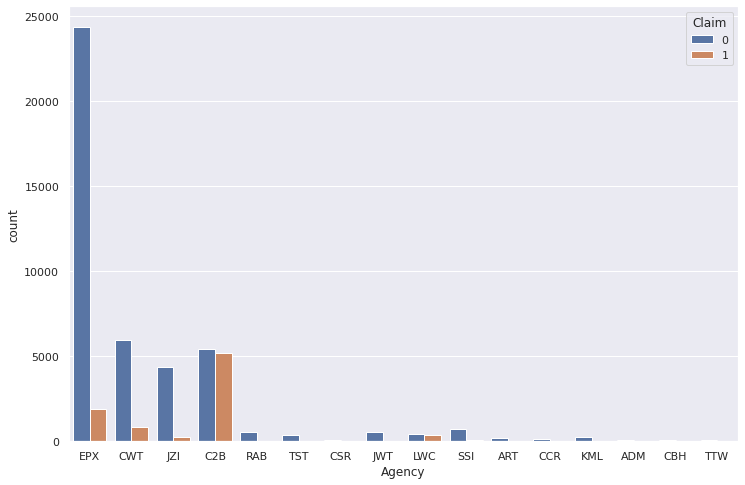

In [15]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="darkgrid")
sns.countplot(x = 'Agency', hue = 'Claim', data = df_train, ax = ax)

The above chart shows how the claims rate is higher among airlines and majorly dominated by online distributions. We will also check for claim rates among product type since there are 25 products and the chart wont display all of those accurately

In [16]:
product_claim = pd.pivot_table(df_train,index=["Product"],values=["Claim"],aggfunc=np.sum)
product_claim.sort_values(by = ['Claim'], ascending = False)

,Claim
Product,
Bronze Plan,2020
2 way Comprehensive Plan,1457
Annual Silver Plan,1451
Silver Plan,1384
Rental Vehicle Excess Insurance,848
Cancellation Plan,355
Basic Plan,246
Annual Gold Plan,172
Gold Plan,143


The Above pivot table shows descending order of clims per product. Bronze Plan, 2 way Comprehensive Plan, Annual Silver Plan, Silver Plan, Rental Vehicle Excess Insurance amounts to over 82% of insurance claims. Lets also check the same for destinations to see which countries amounts to highest claims

In [17]:
country_claim = pd.pivot_table(df_train,index=["Destination"],values=["Claim"],aggfunc=np.sum)
country_claim.sort_values(by = ['Claim'], ascending = False)

,Claim
Destination,
SINGAPORE,5306
CHINA,642
THAILAND,458
AUSTRALIA,455
UNITED STATES,444
...,...
IRELAND,0
HUNGARY,0
GUAM,0



The above pivot shows claims among 97 countries. However 92% claims have occured among top 10 countries : Singapore, China, Thailand, Australia, US, Malaysia, UK, Japan, Korea and Hong Kong. the remaining 87 countries only amounts to 8% claims in our train dataset. The test dataset also shows similar trend

We will be fucussing on the top 20 claim approved countries for our model

We also wish to check distribution of claim rates among different age groups and  duration of flight. FOr that we will have to create separate coulmns for those breaks. We will creat dummies for all categorical variables to have the entire dataset in 0 or 1 values which will be useful and mandatory to execute any preduction models later

I am using the qcut method to cut Age, Sales and Duration into 4 quartiles to get categorical values in those columns. 

**Data Processing**

1. First we will encode all categorical values in the dataframe.


In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train['Destination'] = le.fit_transform(df_train['Destination'])
df_test['Destination'] = le.fit_transform(df_test['Destination'])
df_train['Product'] = le.fit_transform(df_train['Product'])
df_test['Product'] = le.fit_transform(df_test['Product'])
df_train['Agency'] = le.fit_transform(df_train['Agency'])
df_test['Agency'] = le.fit_transform(df_test['Agency'])
df_train['Agency Type'] = le.fit_transform(df_train['Agency Type'])
df_test['Agency Type'] = le.fit_transform(df_test['Agency Type'])
df_train['Channel'] = le.fit_transform(df_train['Channel'])
df_test['Channel'] = le.fit_transform(df_test['Channel'])

Now lets check the distributions among all the features in the dataset

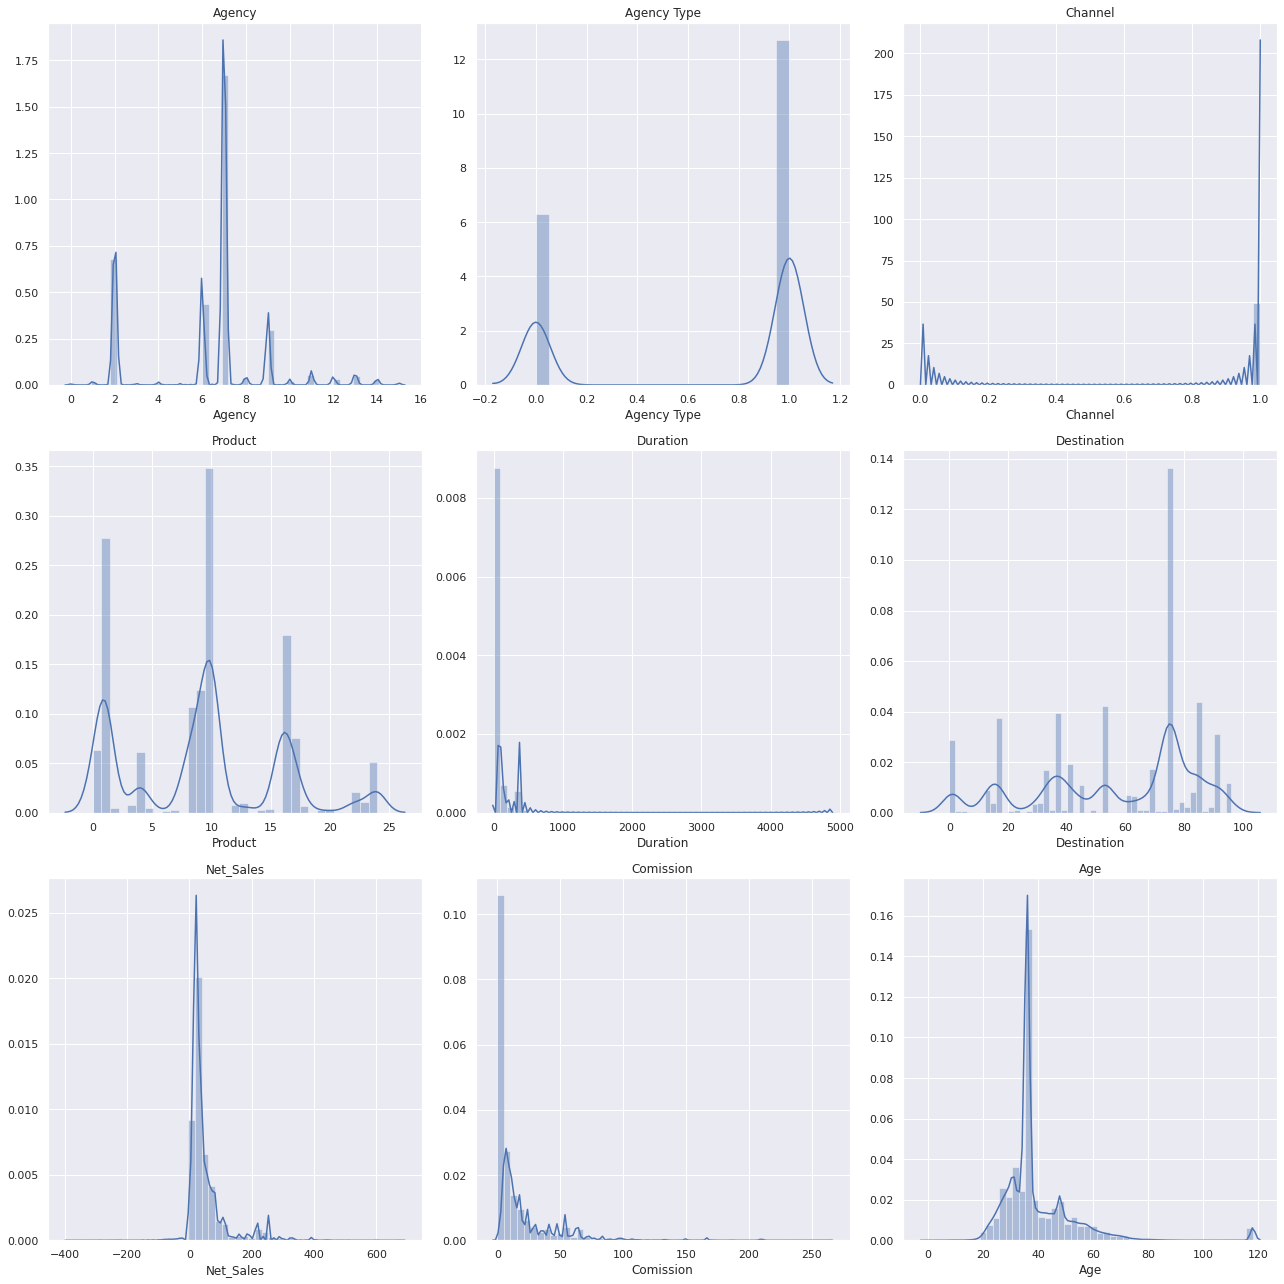

In [19]:
cols = [ 'Agency', 'Agency Type', 'Channel', 'Product', 'Duration',
       'Destination', 'Net_Sales', 'Comission', 'Age']

n_rows = 3
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*6, n_rows*6))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c]   
        
        sns.distplot(df_train[cols[i]], ax=ax)
        ax.set_title(cols[i])
        
       
plt.tight_layout()

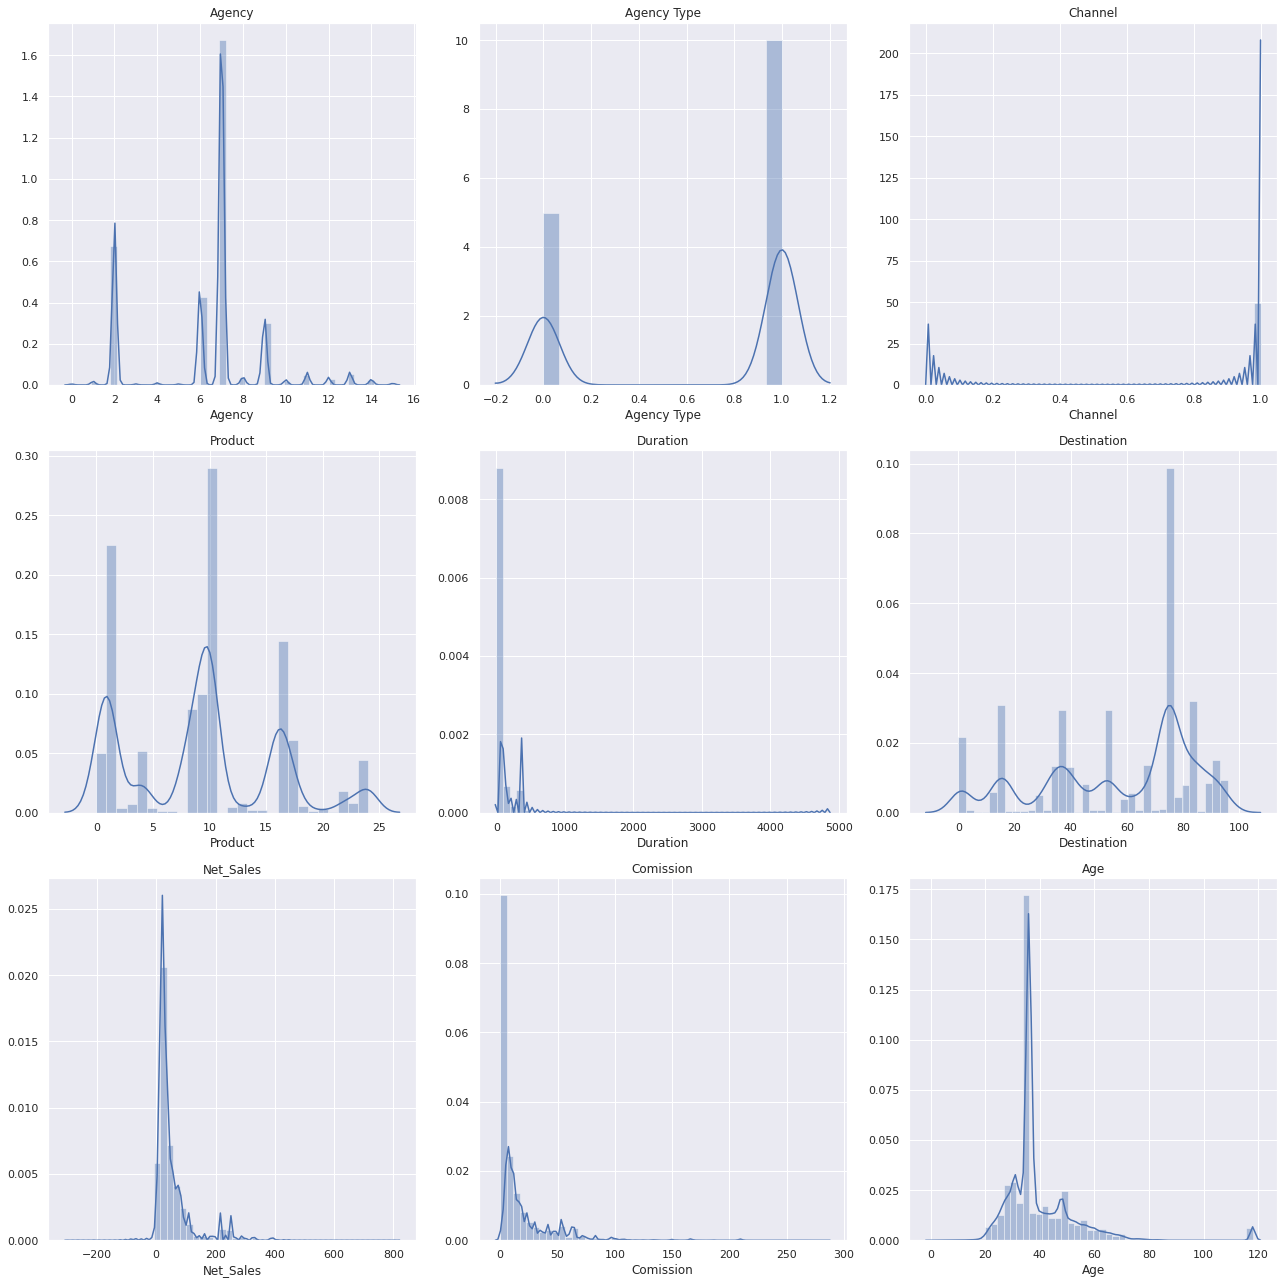

In [20]:
cols = [ 'Agency', 'Agency Type', 'Channel', 'Product', 'Duration',
       'Destination', 'Net_Sales', 'Comission', 'Age']

n_rows = 3
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*6, n_rows*6))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  
        ax = axs[r][c]   
        
        sns.distplot(df_test[cols[i]], ax=ax)
        ax.set_title(cols[i])
        
       
plt.tight_layout()

Both test and train dataset has Comission, Net_Sales and Duration skewed on the right side. We will first treat these features. Lets check for negative or redundant values in these columns

In [21]:
dur =df_train['Duration']<0
dur.sum()

4

In [22]:
dur1 =df_test['Duration']<0
dur1.sum()

1

Duration column in train and test has 4 and 1 negative values respectively. We have to first treat these values. I am replacing the negative values by the mean of Duration

In [23]:
df_train.loc[df_train['Duration'] < 0, 'Duration'] = 24
df_test.loc[df_test['Duration'] < 0, 'Duration'] = 24

Now lets check the values in Net_Sales and Comission columns. Net sales is the sum of a company's gross sales minus its returns, allowances, and discounts. Hence we cannot have a comission value higher than Net sales if Net sales is less than or equal to 0. Lets check that

In [24]:
sale= df_train['Net_Sales']<df_train['Comission']
sale.sum()


1454

In [25]:
sale1 = df_test['Net_Sales']<df_test['Comission']
sale1.sum()

575

We have 1454 such values in train set and 575 in test dataset. We will replace these comission values with 0

In [26]:
df_train.loc[df_train['Net_Sales'] <= 0.0, 'Comission'] = 0
df_test.loc[df_test['Net_Sales'] <= 0.0, 'Comission'] = 0

Now lets check the age column. We have age values greater than 100, we will treat these values to match mean values of the dataset

In [27]:
df_train.loc[df_train['Age'] > 100, 'Age'] = 39.969981
df_test.loc[df_test['Age'] > 100, 'Age'] = 39.969981

In [28]:
#Checking the dataset
df_train.head()

,ID,Agency,Agency Type,Channel,Product,Duration,Destination,Net_Sales,Comission,Age,Claim
0,2010,7,1,1,10,61,68,12.0,0.00,41.0,0
1,4245,7,1,1,10,4,53,17.0,0.00,35.0,0
2,9251,6,1,1,16,26,84,19.8,11.88,47.0,0
3,4754,7,1,1,1,15,33,27.0,0.00,48.0,0
4,8840,7,1,1,1,15,53,37.0,0.00,36.0,0


As we can see above, we have encoded categorial columns and cleaned continous variable columns. We can remove the ID column since it has no use in the train dataset

In [29]:
df_train = df_train.drop(labels = [ 'ID'], axis = 1)


In [30]:
df_train = df_train.apply (pd.to_numeric, errors='coerce')
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)


In [31]:
df_train.isna().sum()

Agency         0
Agency Type    0
Channel        0
Product        0
Duration       0
Destination    0
Net_Sales      0
Comission      0
Age            0
Claim          0
dtype: int64

In [32]:
df_train.head()

,Agency,Agency Type,Channel,Product,Duration,Destination,Net_Sales,Comission,Age,Claim
0,7,1,1,10,61,68,12.0,0.00,41.0,0
1,7,1,1,10,4,53,17.0,0.00,35.0,0
2,6,1,1,16,26,84,19.8,11.88,47.0,0
3,7,1,1,1,15,33,27.0,0.00,48.0,0
4,7,1,1,1,15,53,37.0,0.00,36.0,0


Now we can go ahead with model building. First, we will normalise Age, Duration, Comission and Net_Sales as seen in the displots, their distributions are skewed.

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[['Age', 'Comission', 'Duration', 'Net_Sales']] = scaler.fit_transform(df_train[['Age', 'Comission', 'Duration', 'Net_Sales']])

df_train.head()

,Agency,Agency Type,Channel,Product,Duration,Destination,Net_Sales,Comission,Age,Claim
0,7,1,1,10,0.012497,68,0.374416,0.000000,0.422680,0
1,7,1,1,10,0.000820,53,0.379085,0.000000,0.360825,0
2,6,1,1,16,0.005327,84,0.381699,0.045212,0.484536,0
3,7,1,1,1,0.003073,33,0.388422,0.000000,0.494845,0
4,7,1,1,1,0.003073,53,0.397759,0.000000,0.371134,0


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_test[['Age', 'Comission', 'Duration', 'Net_Sales']] = scaler.fit_transform(df_test[['Age', 'Comission', 'Duration', 'Net_Sales']])

df_test.head()

,ID,Agency,Agency Type,Channel,Product,Duration,Destination,Net_Sales,Comission,Age
0,17631,7,1,1,10,0.039531,33,0.284553,0.000000,0.376344
1,15064,7,1,1,0,0.000412,75,0.286360,0.000000,0.376344
2,14139,2,0,1,9,0.002677,75,0.280488,0.011922,0.247312
3,19754,7,1,1,1,0.027383,82,0.305330,0.000000,0.376344
4,16439,2,0,1,17,0.000412,75,0.295393,0.026455,0.333333


In [35]:
from sklearn.model_selection import *
X = df_train.drop(['Claim'], axis =1)
y = df_train['Claim']
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (36617, 9)
X_test (15693, 9)
y_train (36617,)
y_test (15693,)


Lets check the claim vs unclaimed ratio in the train dataset


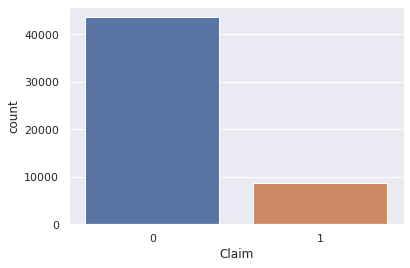

In [36]:
sns.countplot(df_train['Claim'])

As seen, the claim ratio is highly skewed. For any model to have better performance, we will have to oversample the current train dataset.

In [37]:
pip install imblearn 

In [38]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 6106
Before OverSampling, counts of label '0': 30511 



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (61022, 9)
After OverSampling, the shape of train_y: (61022,) 

After OverSampling, counts of label '1': 30511
After OverSampling, counts of label '0': 30511


We can wee above, SMOTE has oversampled the minority class. Lets now go ahead and check for RandomForest Classifier and its performance 

In [39]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [40]:
#Automating the accuracy scores by defining a function
def CrossVal(dataX,dataY,mode,cv=3):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))

In [41]:
#Automating Precision curve, AUC, ROC under a function
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')



Accuracy is :  0.7238046502156262


Text(0.5, 1.0, 'F1 Score = 0.47233314318311465')

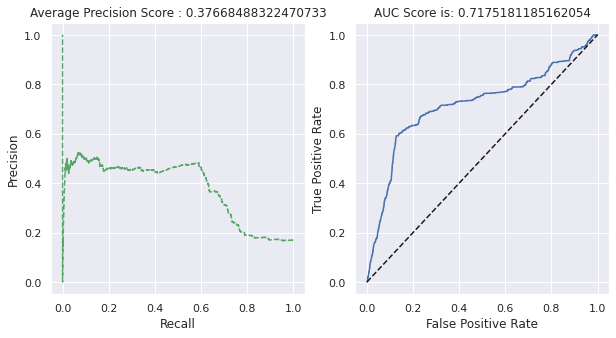

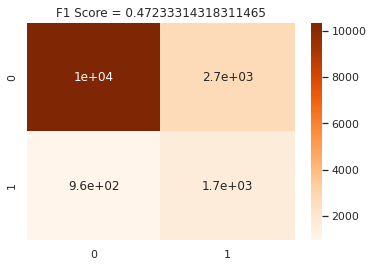

In [42]:
sgd=SGDClassifier(tol=1e-10, random_state=23,loss='log', penalty= "l2", alpha=0.2)
score_sgd=CrossVal(X_train_res,y_train_res,sgd)
print("Accuracy is : ",score_sgd)
sgd.fit(X_train_res,y_train_res)
plotting(y_test,sgd.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,sgd.predict(X_test)), annot= True, cmap='Oranges')
sgd_f1=f1_score(y_test,sgd.predict(X_test))
plt.title('F1 Score = {}'.format(sgd_f1))

Accuracy is :  0.8661957640582703


Text(0.5, 1.0, 'F1 Score = 0.624688442870261')

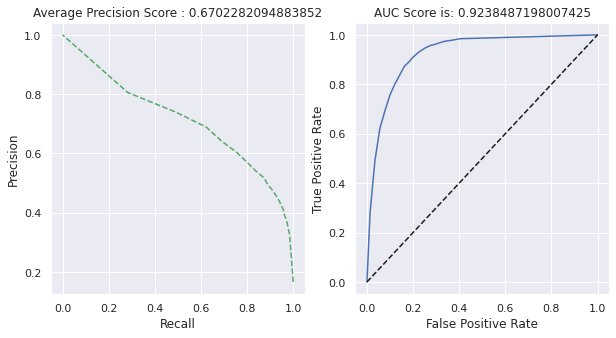

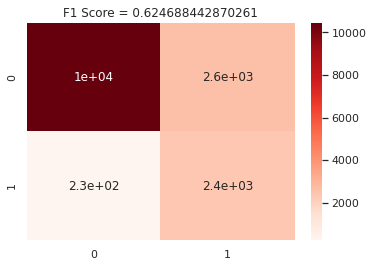

In [43]:
k=KNeighborsClassifier(algorithm='auto',n_neighbors= 19)
score_k=CrossVal(X_train_res,y_train_res,k)
print("Accuracy is : ",score_k)
k.fit(X_train_res,y_train_res)
plotting(y_test,k.predict_proba(X_test))


fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,k.predict(X_test)), annot= True, cmap='Reds')
k_f1=f1_score(y_test,k.predict(X_test))
plt.title('F1 Score = {}'.format(k_f1))

Accuracy is :  0.7900101604258344


Text(0.5, 1.0, 'F1 Score = 0.5181026581118241')

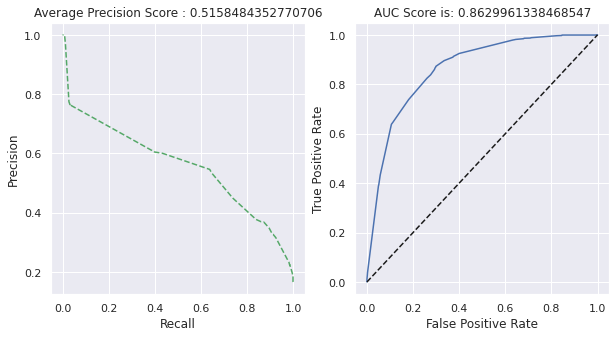

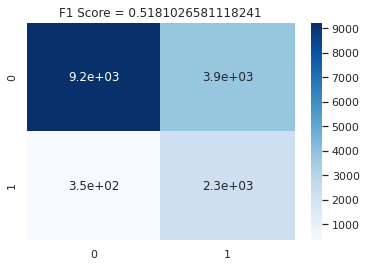

In [44]:
dtc=DecisionTreeClassifier(max_depth=6)
score_dtc=CrossVal(X_train_res,y_train_res,dtc)
print("Accuracy is : ",score_dtc)
dtc.fit(X_train_res,y_train_res)
plotting(y_test,dtc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,dtc.predict(X_test)), annot= True, cmap='Blues')

dtc_f1=f1_score(y_test,dtc.predict(X_test))
plt.title('F1 Score = {}'.format(dtc_f1))

Accuracy is: 0.7352430256199965


Text(0.5, 1.0, 'F1 Score = 0.4437641421536004')

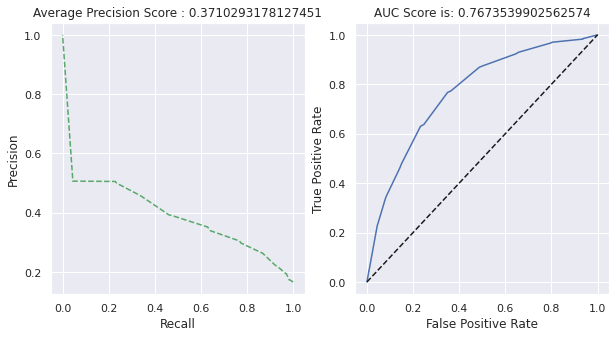

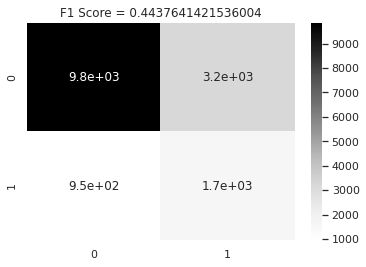

In [45]:
bc=BaggingClassifier(dtc,max_samples=23, bootstrap=True, n_jobs= -1)
score_bc= CrossVal(X_train_res,y_train_res,bc)
print('Accuracy is:',score_bc)
bc.fit(X_train_res,y_train_res)
plotting(y_test,bc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,bc.predict(X_test)), annot= True, cmap='Greys')

bc_f1=f1_score(y_test,bc.predict(X_test))
plt.title('F1 Score = {}'.format(bc_f1))

Accuracy is :  0.7915341864346294


Text(0.5, 1.0, 'F1 Score = 0.5493550934456435')

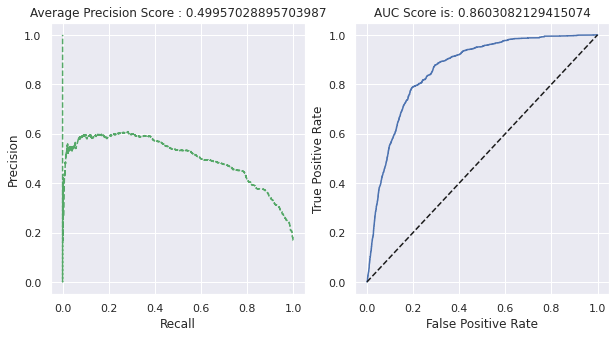

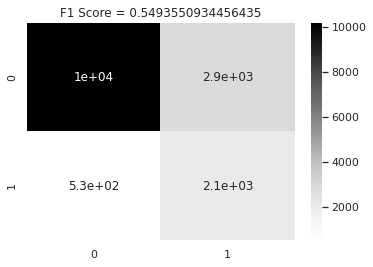

In [ ]:
svc=SVC(C=0.2,probability=True,kernel='rbf',gamma=0.1)
score_svc=CrossVal(X_train_res,y_train_res,svc)
print("Accuracy is : ",score_svc)
svc.fit(X_train_res,y_train_res)
plotting(y_test,svc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,svc.predict(X_test)), annot= True, cmap='Greys')
svc_f1=f1_score(y_test,svc.predict(X_test))
plt.title('F1 Score = {}'.format(svc_f1))


Accuracy is: 0.8367473434061994


Text(0.5, 1.0, 'F1 Score = 0.6292532037118868')

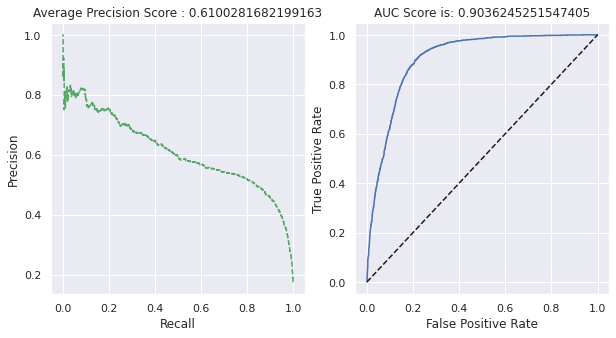

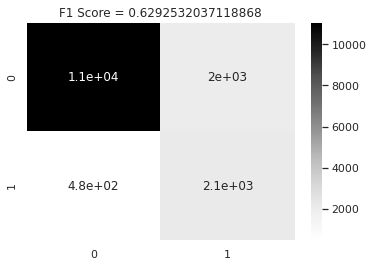

In [ ]:
vc=VotingClassifier(estimators=[('knn',k),('SGD',sgd),('dtc', dtc), ('bc',bc),('SVC', svc)],
                    voting='soft')
score_vc= CrossVal(X_train_res,y_train_res,vc)
print('Accuracy is:',score_vc)
vc.fit(X_train_res,y_train_res)
plotting(y_test,vc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,vc.predict(X_test)), annot= True, cmap='Greys')

vc_f1=f1_score(y_test,vc.predict(X_test))
plt.title('F1 Score = {}'.format(vc_f1))

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

Accuracy is: 0.9561142557094106


Text(0.5, 1.0, 'F1 Score = 0.8136511375947996')

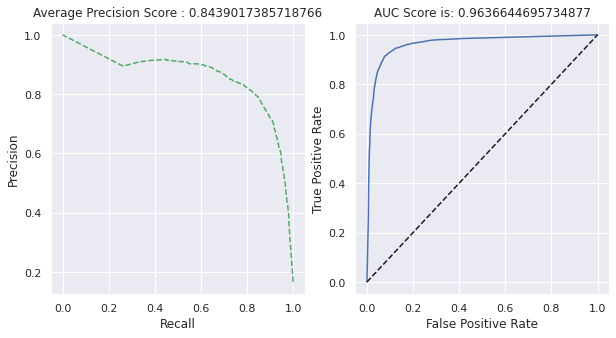

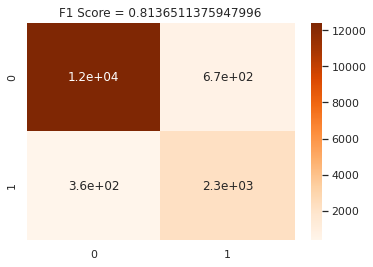

In [47]:
etc=ExtraTreesClassifier(bootstrap= False, ccp_alpha=0, class_weight= None, criterion= 'gini', max_depth= None, max_features='auto', min_impurity_decrease= 0.0, min_impurity_split= None, min_weight_fraction_leaf=0, n_estimators=100, n_jobs=-1, oob_score= False, random_state=123, verbose=0, warm_start=False)
score_etc= CrossVal(X_train_res,y_train_res,etc)
print('Accuracy is:',score_etc)
etc.fit(X_train_res,y_train_res)
plotting(y_test,etc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,etc.predict(X_test)), annot= True, cmap='Oranges')

etc_f1=f1_score(y_test,etc.predict(X_test))
plt.title('F1 Score = {}'.format(etc_f1))

In [50]:
etc1=ExtraTreesClassifier(bootstrap= False, ccp_alpha=0, class_weight= None, criterion= 'gini', max_depth= None, max_features='auto', min_impurity_decrease= 0.0, min_impurity_split= None, min_weight_fraction_leaf=0, n_estimators=100, n_jobs=-1, oob_score= False, random_state=123, verbose=0, warm_start=False)

Accuracy is: 0.9560978595832567


Text(0.5, 1.0, 'F1 Score = 0.8146027201145312')

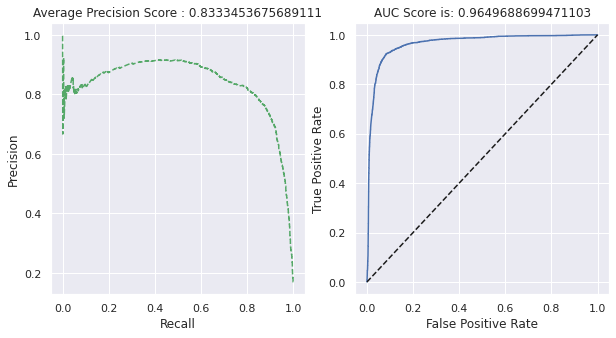

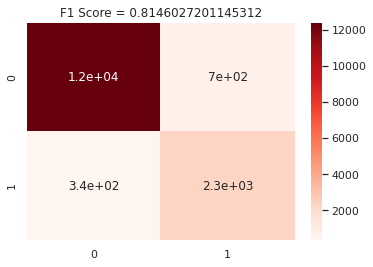

In [51]:
abc=AdaBoostClassifier(etc1,n_estimators=50, random_state=343, learning_rate=0.1)
score_ada= CrossVal(X_train_res,y_train_res,abc)
print('Accuracy is:',score_ada)
abc.fit(X_train_res,y_train_res)
plotting(y_test,abc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,abc.predict(X_test)), annot= True, cmap='Reds')

abc_f1=f1_score(y_test,abc.predict(X_test))
plt.title('F1 Score = {}'.format(abc_f1))

Lets check for Random Forest Performance

Accuracy is: 0.9553440849252787


Text(0.5, 1.0, 'F1 Score = 0.8227825140576819')

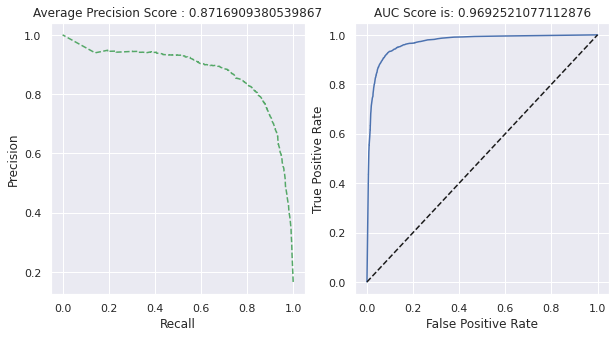

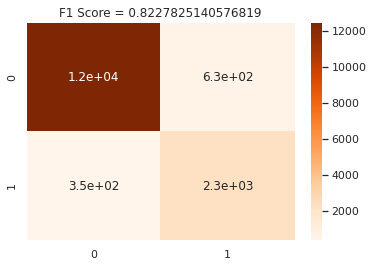

In [52]:
rf=RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=97)
score_rf= CrossVal(X_train_res,y_train_res,rf)
print('Accuracy is:',score_rf)
rf.fit(X_train_res,y_train_res)
plotting(y_test,rf.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,rf.predict(X_test)), annot= True, cmap='Oranges')

rf_f1=f1_score(y_test,rf.predict(X_test))
plt.title('F1 Score = {}'.format(rf_f1))

In [53]:
predictions = rf.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     13079
           1       0.78      0.87      0.82      2614

    accuracy                           0.94     15693
   macro avg       0.88      0.91      0.89     15693
weighted avg       0.94      0.94      0.94     15693



Random Forest is showing promisng results. The report shows Accuracy of the model to be 96% and avg precision of 87%. Lets try to imporve the score by using AdaBoost Classifier

Accuracy is: 0.9572777796388682


Text(0.5, 1.0, 'F1 Score = 0.8248056409329235')

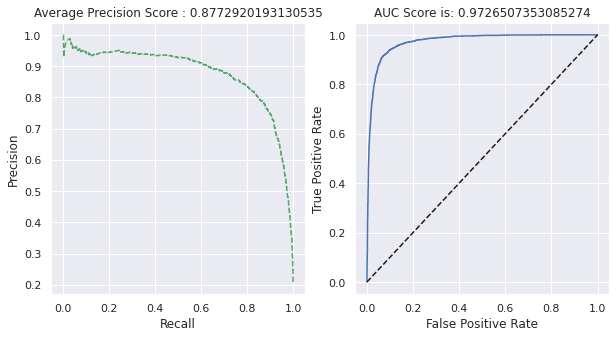

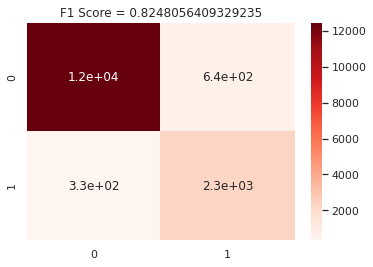

In [54]:
abc=AdaBoostClassifier(rf,n_estimators=50, random_state=343, learning_rate=0.1)
score_ada= CrossVal(X_train_res,y_train_res,abc)
print('Accuracy is:',score_ada)
abc.fit(X_train_res,y_train_res)
plotting(y_test,abc.predict_proba(X_test))

fig=plt.figure()
sns.heatmap(confusion_matrix(y_test,abc.predict(X_test)), annot= True, cmap='Reds')

abc_f1=f1_score(y_test,abc.predict(X_test))
plt.title('F1 Score = {}'.format(abc_f1))

In [55]:
predictions_abc = abc.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions_abc)) 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     13079
           1       0.78      0.87      0.82      2614

    accuracy                           0.94     15693
   macro avg       0.88      0.91      0.89     15693
weighted avg       0.94      0.94      0.94     15693



After checking few of the models, we can conclude Random Forest with Adaboost classifier yields the best results. The mean precision with Adaboost is 88%. We can now go ahead and predict the test dataset claim approval statuses

In [56]:
df_test_1 = df_test.drop(labels = ['ID'], axis = 1)
df_test_1.head()

,Agency,Agency Type,Channel,Product,Duration,Destination,Net_Sales,Comission,Age
0,7,1,1,10,0.039531,33,0.284553,0.000000,0.376344
1,7,1,1,0,0.000412,75,0.286360,0.000000,0.376344
2,2,0,1,9,0.002677,75,0.280488,0.011922,0.247312
3,7,1,1,1,0.027383,82,0.305330,0.000000,0.376344
4,2,0,1,17,0.000412,75,0.295393,0.026455,0.333333


In [57]:
test = abc.predict(df_test_1)

In [58]:
df_test['Claim'] = test.tolist()
df_test.head()

,ID,Agency,Agency Type,Channel,Product,Duration,Destination,Net_Sales,Comission,Age,Claim
0,17631,7,1,1,10,0.039531,33,0.284553,0.000000,0.376344,0
1,15064,7,1,1,0,0.000412,75,0.286360,0.000000,0.376344,0
2,14139,2,0,1,9,0.002677,75,0.280488,0.011922,0.247312,0
3,19754,7,1,1,1,0.027383,82,0.305330,0.000000,0.376344,0
4,16439,2,0,1,17,0.000412,75,0.295393,0.026455,0.333333,0


In [64]:
df_test.to_csv('Prediction.csv')